# **This notebook focuses on Natural Language Processing. We will visualize the Reviews that people have put forward. And also based on their reviews we will be building a Prediction Model using different machine learning and deep learning models which signifies whether they are happy or disappointed with the product. This model can be used for business purposes as well and manufacturers can use customer reviews and suggestions to improve their products!**

### * First we'll do the pre-processing
### * Next we'll do some visualization
### * We'll try out different methods for text classification ( like Random Forest, SVM, XGBoost, Deep Learning)


## Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
os.listdir("../input")

['GrammarandProductReviews.csv']

In [6]:
df=pd.read_csv('../input/GrammarandProductReviews.csv')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


## Data Pre-Processing

In [7]:
df.shape

(71044, 25)

In [8]:
df.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [9]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

### Since our prediction model will be beased on the text reviews, we'll drop the rows having null values

In [10]:
df = df.dropna(subset=['reviews.text'])

# **What are the words that people have used the most in their reviews ?**

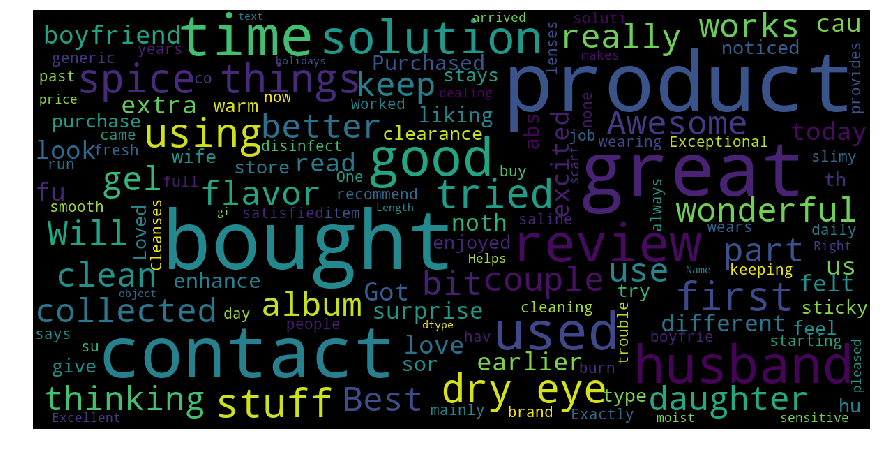

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews.text'])

## So what is the maximum no. of ratings that people gave?

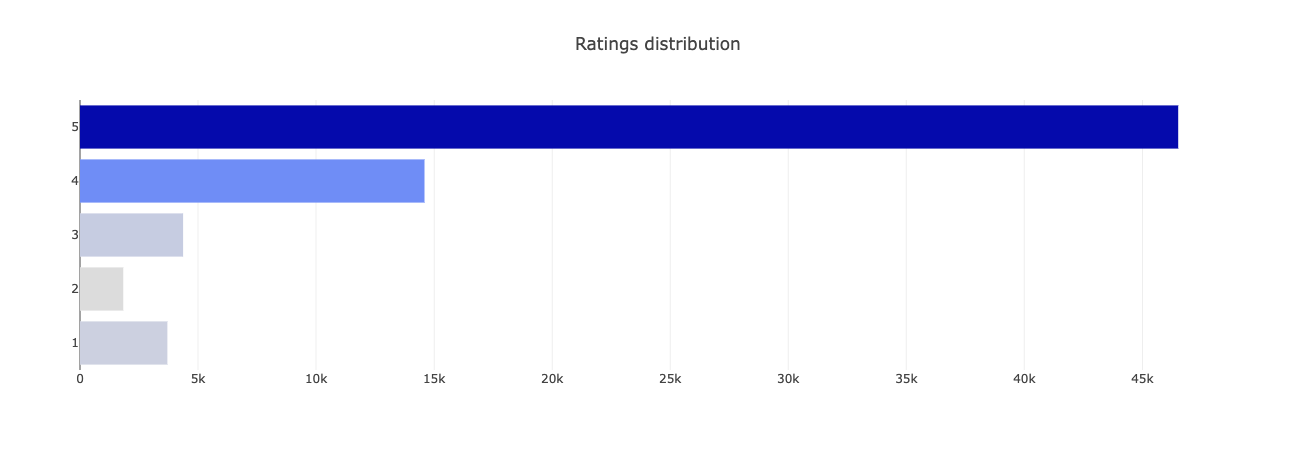

In [12]:
cnt_srs = df['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

# Now let's have a look what do the length of the reviews tell about the ratings

In [13]:
df['reviews_length']=df['reviews.text'].apply(len)

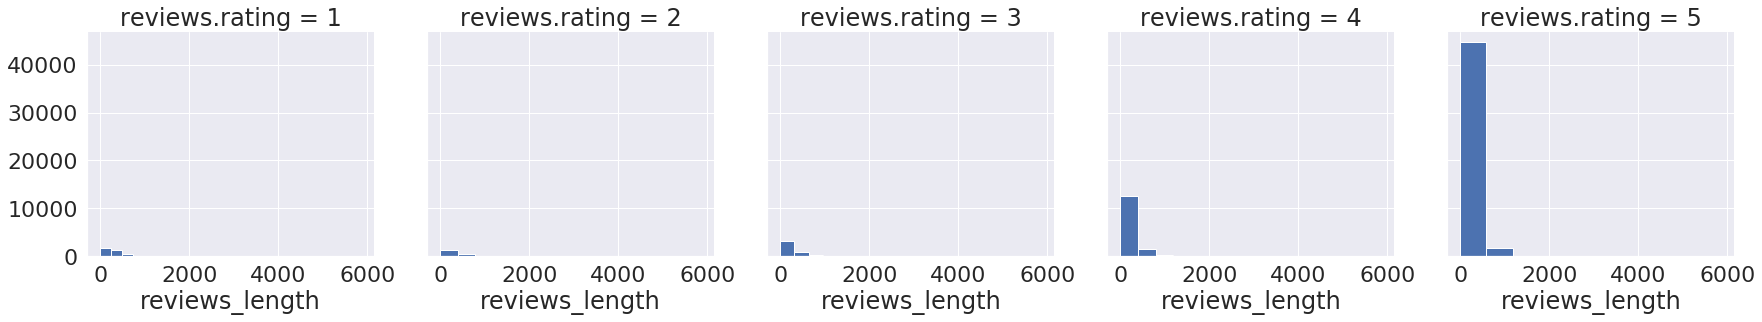

In [14]:
sns.set(font_scale=2.0)

g = sns.FacetGrid(df,col='reviews.rating',size=5)
g.map(plt.hist,'reviews_length')

# **Who all are giving fake reviews?**

In [15]:
df['reviews.didPurchase'].fillna("Review N/A",inplace=True)

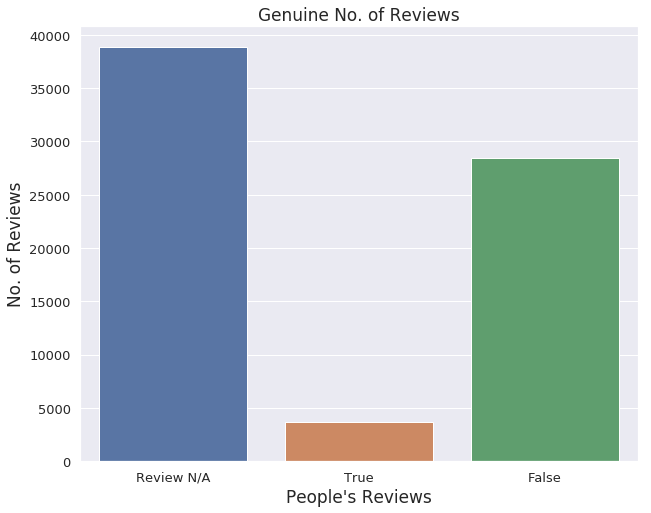

In [16]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)
ax.tick_params(labelsize=13)

# Now lets plot the correlation map

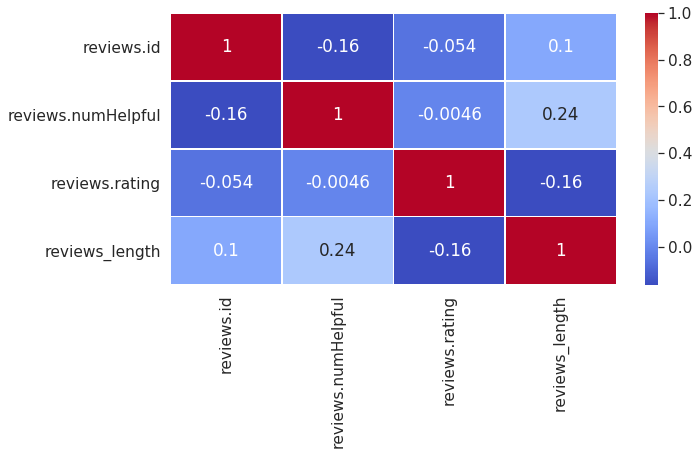

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

All e-commerce websites having False reviews like this. IDK what strategy they bring up to deal with this.

In [18]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews.text']
train_text=df['reviews.text']
y=df['reviews.rating']

## Using the n-gram tfidf vectorizer

In [19]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [20]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

# Random Forest Classifier

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score

# Next we come to XGBoost

In [24]:
import xgboost as xgb

In [25]:
xgb=xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [27]:
preds2=xgb.predict(X_test)

In [28]:
xgb_accuracy=accuracy_score(preds2,y_test)


In [29]:
rf_accuracy=accuracy_score(preds,y_test)

In [30]:
print("Random Forest Model accuracy",rf_accuracy)

Random Forest Model accuracy 0.7036567619584096


In [31]:
print("XGBoost Model accuracy",xgb_accuracy)

XGBoost Model accuracy 0.6922029761066516


# So which is better for NLP, Bagging or Boosting?

## Deep Learning 

We will do one thing here, we will classify ratings<4 as  sentiments, i.e. we will replace ratings less than 4 as not happy and vice-versa

So label 1= Happy
label 2= Unhappy

In [32]:
df['sentiment'] = df['reviews.rating']<4

In [33]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['sentiment'],test_size = 0.2)

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [35]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26100 unique tokens.


In [36]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (56806, 200)
Shape of data test tensor: (14202, 200)


In [37]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, test_y))

Train on 56806 samples, validate on 14202 samples
Epoch 1/10
56806/56806 [==============================] - 355s 6ms/step - loss: 0.2712 - acc: 0.8958 - val_loss: 0.2181 - val_acc: 0.9135
Epoch 2/10
56806/56806 [==============================] - 350s 6ms/step - loss: 0.1948 - acc: 0.9257 - val_loss: 0.2114 - val_acc: 0.9197
Epoch 3/10
56806/56806 [==============================] - 359s 6ms/step - loss: 0.1640 - acc: 0.9395 - val_loss: 0.2137 - val_acc: 0.9185
Epoch 4/10


KeyboardInterrupt: 